In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

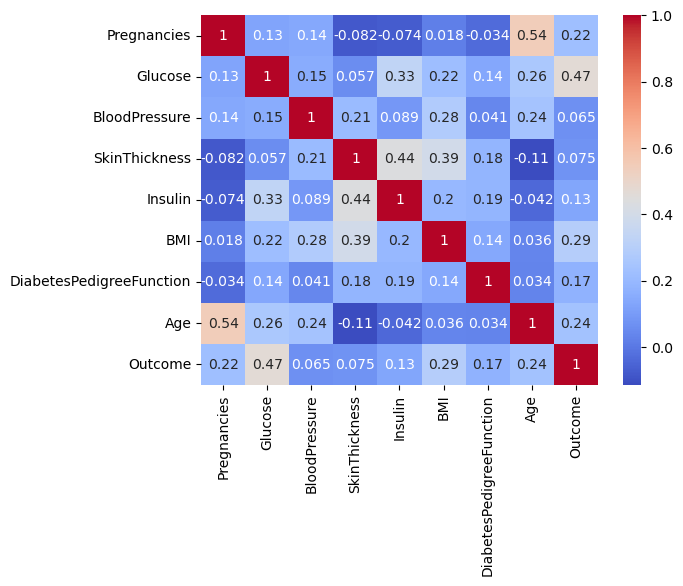

In [10]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [11]:
from sklearn.linear_model import LogisticRegression

# Split dataset into input features and target variable
X = df[['Age']]
y = df['Outcome']

# Create logistic regression model and fit to data
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [12]:
coef = model.coef_
print(coef)

[[0.04202466]]


In [13]:
intercept = model.intercept_
print(intercept)

[-2.04744865]


In [14]:
lrf = model.coef_ * 60 + model.intercept_
from scipy.special import expit

if expit(lrf)>0.5:
    print('YES he will become diabetic')
else:
    print('NO, he will not be diabetic')

YES he will become diabetic


In [15]:
# Split dataset into input features and target variable
X = df[['Glucose', 'BMI', 'Age']]
y = df['Outcome']

# Create logistic regression model and fit to data
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X, y)

LogisticRegression(max_iter=10000)

In [16]:
prediction = model.predict([[150,30,40]])

if prediction==1:
    print('YES he will become diabetic')
else:
    print('NO, he will not be diabetic')

YES he will become diabetic


C:\Users\8mpra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [17]:
model.predict_proba([[150,30,40]])

C:\Users\8mpra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.46580162, 0.53419838]])

In [18]:
X=df.drop(['Outcome'],axis=1)
y = df['Outcome']
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create logistic regression model and fit to training data
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

AUC: 0.7403225806451613


In [20]:
from sklearn.metrics import roc_auc_score
import numpy as np

def get_auc(X, y, variables):
    X_subset = X.loc[:, variables]
    clf = LogisticRegression()
    clf.fit(X_subset, y)
    y_prob = clf.predict_proba(X_subset)[:, 1]
    auc = roc_auc_score(y, y_prob)
    return auc

def best_next(X, y, current_vars):
    variables_to_try = list(set(X.columns) - set(current_vars))
    best_auc = 0
    best_var = None
    for var in variables_to_try:
        variables = current_vars + [var]
        auc = get_auc(X, y, variables)
        if auc > best_auc:
            best_auc = auc
            best_var = var
    return best_var

def forward_selection(X, y, num_vars):
    current_vars = []
    auc_scores = []
    while len(current_vars) < num_vars:
        best_var = best_next(X, y, current_vars)
        current_vars.append(best_var)
        auc_score = get_auc(X, y, current_vars)
        auc_scores.append(auc_score)
    return current_vars ,auc_scores


In [21]:
forward_selection(X, y, 7)

C:\Users\8mpra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(['Glucose',
  'BMI',
  'Pregnancies',
  'DiabetesPedigreeFunction',
  'BloodPressure',
  'Age',
  'SkinThickness'],
 [0.7881305970149254,
  0.8109328358208956,
  0.8260559701492536,
  0.8345223880597016,
  0.8370298507462688,
  0.838358208955224,
  0.8387611940298508])

In [22]:
train=forward_selection(X_train, y_train, 7)
test=forward_selection(X_test, y_test, 7)

C:\Users\8mpra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\8mpra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [23]:
train

(['Glucose',
  'BMI',
  'Age',
  'DiabetesPedigreeFunction',
  'BloodPressure',
  'Pregnancies',
  'Insulin'],
 [0.782320913146156,
  0.8063434794017318,
  0.8174626082393073,
  0.825610076095513,
  0.8286276567829965,
  0.8307662030963002,
  0.8304644450275518])

In [24]:
test

(['Glucose',
  'Pregnancies',
  'DiabetesPedigreeFunction',
  'BMI',
  'BloodPressure',
  'SkinThickness',
  'Insulin'],
 [0.8066997518610421,
  0.8535359801488833,
  0.8632754342431762,
  0.8692307692307693,
  0.8818858560794045,
  0.8856079404466503,
  0.887593052109181])

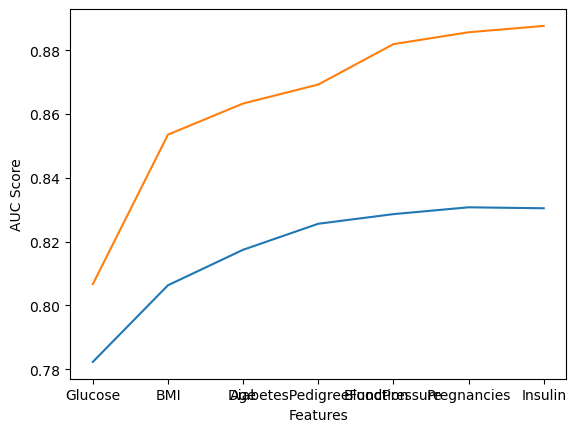

In [25]:
import matplotlib.pyplot as plt

# Plot the line graph
plt.plot(train[0],train[1],test[1])

# Set the x-axis label
plt.xlabel('Features')

# Set the y-axis label
plt.ylabel('AUC Score')

# Show the plot
plt.show()


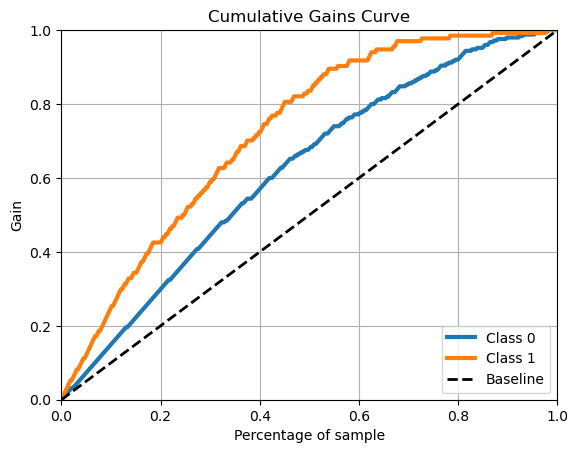

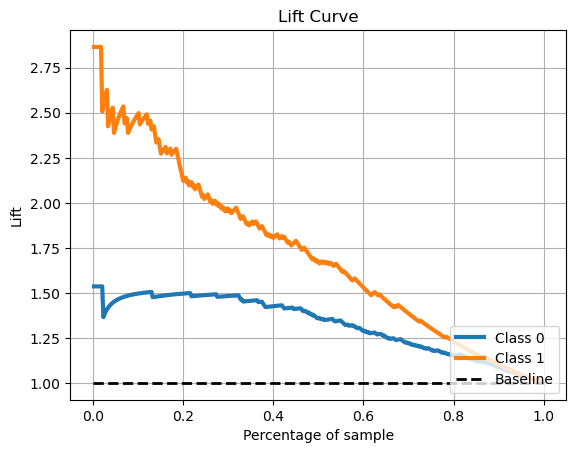

In [26]:
import scikitplot as skplt
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.5,random_state=42)
y_pred = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,y_pred)
plt.show()

skplt.metrics.plot_lift_curve(y_test,y_pred)
plt.show()